## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
'''
-Thomas Brown 6/9/20
-Full time, online
-Scheduled Review: tbd
-Instructor Name: Abhineet Kulkarni
-Blog URL: 
'''

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import os
%matplotlib inline

In [5]:
#import data
#provided data
df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
from glob import glob

In [7]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/imdb.title.crew.csv.gz',
 './zippedData/imdb.title.principals.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz']

In [9]:
type(csv_files)
d = {}
for file in csv_files:
    d[file] = pd.read_csv(file)
    
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df
    
csv_files_dict.keys()

dict_keys(['bom_movie_gross_gz', 'imdb_name_basics_gz', 'imdb_title_akas_gz', 'imdb_title_basics_gz', 'imdb_title_crew_gz', 'imdb_title_principals_gz', 'imdb_title_ratings_gz', 'tmdb_movies_gz', 'tn_movie_budgets_gz'])

In [10]:
csv_files_dict['imdb_title_crew_gz'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(2)
memory usage: 3.3+ MB


In [11]:
conn = sqlite3.connect("movies_db.sqlite")

In [13]:
def create_sql_table_from_df(df, name, conn):
    try:
        df.to_sql(name, conn)
        print(f"Created table {name}")
    
    except Exception as e:
        print(f"could not make table {name}")
        print(e)
        
for name, table in csv_files_dict.items():
    create_sql_table_from_df(table, name, conn)

Created table bom_movie_gross_gz
Created table imdb_name_basics_gz
Created table imdb_title_akas_gz
Created table imdb_title_basics_gz
Created table imdb_title_crew_gz
Created table imdb_title_principals_gz
Created table imdb_title_ratings_gz
Created table tmdb_movies_gz
Created table tn_movie_budgets_gz


In [14]:
conn.execute("select name from sqlite_master where type='table';").fetchall()

[('bom_movie_gross_gz',),
 ('imdb_name_basics_gz',),
 ('imdb_title_akas_gz',),
 ('imdb_title_basics_gz',),
 ('imdb_title_crew_gz',),
 ('imdb_title_principals_gz',),
 ('imdb_title_ratings_gz',),
 ('tmdb_movies_gz',),
 ('tn_movie_budgets_gz',)]

In [16]:
cur = conn.cursor()

In [43]:
cur.execute("""SELECT title, domestic_gross, title_id
            FROM bom_movie_gross_gz
            JOIN imdb_title_akas_gz
            USING(title)
            WHERE is_original_title == 1
            ORDER BY domestic_gross DESC;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
df.head()

,title,domestic_gross,title_id
0,Black Panther,700100000.0,tt1825683
1,Avengers: Infinity War,678800000.0,tt4154756
2,Jurassic World,652300000.0,tt0369610
3,Incredibles 2,608600000.0,tt3606756
4,Finding Dory,486300000.0,tt2277860


In [37]:
cur.execute("""SELECT movie, worldwide_gross, 
               production_budget, 
               release_date 
               FROM tn_movie_budgets_gz
               ORDER BY production_budget DESC
               LIMIT 100;""")
df1 = pd.DataFrame(cur.fetchall())
df1.columns = [i[0] for i in cur.description]
df1.dtypes

movie                object
worldwide_gross      object
production_budget    object
release_date         object
dtype: object

In [46]:
cur.execute("""SELECT title, domestic_gross
            FROM bom_movie_gross_gz
            ORDER BY domestic_gross DESC
            Limit 25;""")
df2 = pd.DataFrame(cur.fetchall())
df2.columns = [i[0] for i in cur.description]
df2.head()

,title,domestic_gross
0,Star Wars: The Force Awakens,936700000.0
1,Black Panther,700100000.0
2,Avengers: Infinity War,678800000.0
3,Jurassic World,652300000.0
4,Marvel's The Avengers,623400000.0


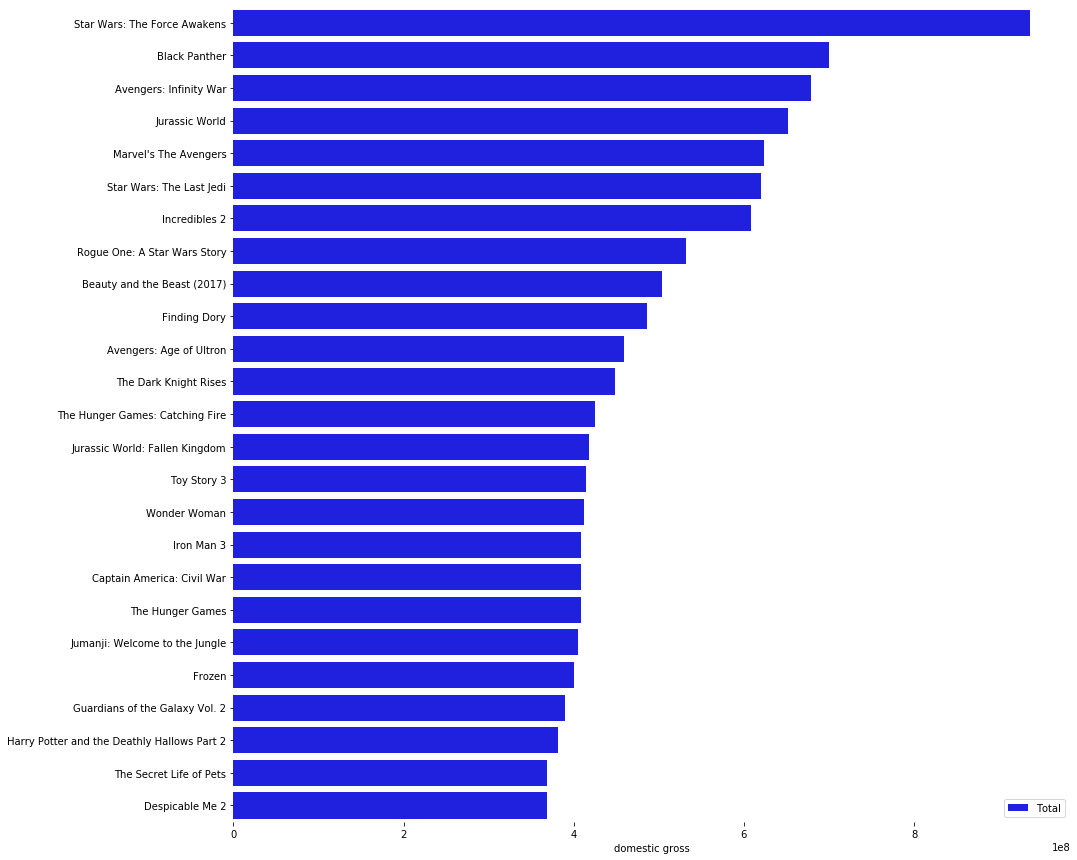

In [55]:
f, ax = plt.subplots(figsize=(15,15))
sns.barplot(x="domestic_gross", y="title", data=df2,
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="domestic gross")
sns.despine(left=True, bottom=True)